<a href="https://colab.research.google.com/github/Aishwarya-RaviK/Chennai-House-Price-Prediction/blob/main/CHENNAI_HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **☛ Problem Statement :**
Real estate transactions are quite opaque sometimes and it may be  difficult for a newbie to know the fair price of any given home. 
Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it.
Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build 
homes that fetch them more money.
It is expected to build a sale price prediction model that will aid the customers to find a fair price for their homes 
and also help the sellers understand what factors are fetching more money for the houses.

## **Variables in the Dataset :**
   ✤ PRT_ID : Project ID (object)

   ✤ AREA : Area where the house is located (object)
   
   ✤ INT_SQFT : Total area of the house in square-feet (int)
   
   ✤ DATE_SALE : Date on which the house got sold (object)
   
   ✤ DIST_MAINROAD : Distance from the house to the mainroad -in meters(int)
   
   ✤ N_BEDROOM : Number of Bedrooms (float)
   
   ✤ N_BATHROOM : Number of Bathrooms (float)
   
   ✤ N_ROOM : Number of Rooms (int)
   
   ✤ SALE_COND : Sale Conditions (object)
   
   ✤ PARK_FACIL : Parking Facility (object)
   
   ✤ DATE_BUILD : Date on which the house was built (object)
   
   ✤ BUILD_TYPE : Type of the house (object)
   
   ✤ UTILITY_AVAIL : Utilities available for the owner of the house (object)
   
   ✤ STREET : Street where the house is located (object)
   
   ✤ MZZONE : Chennai Regions are divided into multiple zones, MZZONE is nothing but the zone where the house belongs to (object)
   
   ✤ QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL : Masked Data (float)
   
   ✤ REG_FEE : Registration Fees (int)
   
   ✤ COMMIS : Commission (int)
   
   ✤ SALE_PRICE : Price at which the house got sold (int)

# **Importing necessary dependencies**

In [ ]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# **READING THE DATA**

In [ ]:
data=pd.read_csv("/content/Chennai houseing sale.csv")
pd.set_option('display.max_columns',None)
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
data.shape

(7109, 22)

There are nearly **7109 rows** with **22 features**.

There are three features namely PRT_ID, REG_FEE and COMMIS which does not contribute to the sale price of a house, so we drop it.

# **DROPPING UNIMPORTANT FEATURES**

In [ ]:
data=data.drop(columns=['PRT_ID', 'REG_FEE','COMMIS'])

In [ ]:
data.shape

(7109, 19)

Now we have 19 features to deal with.

# **DATA CLEANING**

**1. Null Values**

In [ ]:
data.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64



1.   There is only one missing value in bedroom, so we fill it with mode.
2.   In Bathroom column, there are 5 missing value again we can go with mode.
3.  The columns qs_overall is a special case as the data in that column is masked and the data is in floating point number,
it is good to replace it with mean.


In [ ]:
data['N_BEDROOM'] = data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode)
data['N_BATHROOM'] = data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode)
data['QS_OVERALL']=data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean)

In [ ]:
data.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

There are no null values in our data.

To fix the nan values we drop them as there are only 6 such rows.

In [ ]:
data.isna().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

**2. Duplicates**

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(7109, 19)

No duplicates found in the dataset.

**3. Data Types**

In [ ]:
data.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL        object
SALES_PRICE        int64
dtype: object

It is observed that the data-type of certain columns are not exactly the right data-type suitable for those corresponding columns: 

⃰ The data type of columns n_bedroom and n_bathroom are unnecessarily given as 'float' but it is better to change them into 'int' for better computation.

⃰ The data type of columns date_sale and date_build are as 'strings' but should be of 'datetime'.

In [ ]:
#correcting data type of columns date_sale and date_build
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'])

In [ ]:
data['N_BEDROOM'] = pd.to_numeric(data['N_BEDROOM'],errors='coerce')
data['N_BATHROOM']=pd.to_numeric(data['N_BATHROOM'],errors='coerce')
data['QS_OVERALL']=pd.to_numeric(data['QS_OVERALL'],errors='coerce')

In [ ]:
data.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

The number of bedrooms and bathrooms are in float so we change to int first.

In [ ]:
# correcting data type of columns n_bedroom and n_bathroom
data['N_BEDROOM'] = data['N_BEDROOM'].astype(int)
data['N_BATHROOM'] = data['N_BATHROOM'].astype(int)

Now, the data types are in correct format.

# **FEATURE ENGINEERING**

In the feature list we have two features which don't add value if considered as such, the features are Date of sale, date of building, so here we find age of the building date of **Age of house = built - date of sale** 

In [ ]:
data['house_age'] = data['DATE_SALE'] - data['DATE_BUILD']

In [ ]:
# Function to change days to years
def days_to_year(data):
    no_of_days = data.days
    no_of_years = round(no_of_days/365)
    return no_of_years

In [ ]:
data['house_age'] = data['house_age'].apply(days_to_year)

In [ ]:
data.drop(columns = ['DATE_SALE','DATE_BUILD'],inplace=True)

In [ ]:
# viewing how many columns in the dataframe fall in the object and the numeric data types
pd.DataFrame(data.dtypes.value_counts()).T

,object,int64,float64,datetime64[ns]
0,7,7,4,2


To explore **object** data features

In [ ]:
object_data_cols = [var for var in data.columns if data[var].dtype == 'object']
object_data_cols

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

Let us see how many categories are in each of these feature.

In [ ]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(data[i].value_counts())}" categories.')

Column "AREA" is divided into "17" categories.
Column "SALE_COND" is divided into "9" categories.
Column "PARK_FACIL" is divided into "3" categories.
Column "BUILDTYPE" is divided into "5" categories.
Column "UTILITY_AVAIL" is divided into "5" categories.
Column "STREET" is divided into "5" categories.
Column "MZZONE" is divided into "6" categories.


In [ ]:
data['AREA'].value_counts()

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [ ]:
data['AREA'] = data['AREA'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar','Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Velchery':'Velachery','Adyr':'Adyar','KKNagar':'KK Nagar'})

In [ ]:
data['AREA'].value_counts()

Chrompet      1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: AREA, dtype: int64

In [ ]:
data['SALE_COND'].value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [ ]:
data['SALE_COND'] = data['SALE_COND'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'})

In [ ]:
data['PARK_FACIL'].value_counts()

Yes    3557
No     3498
Noo       1
Name: PARK_FACIL, dtype: int64

In [ ]:
data['PARK_FACIL'] = data['PARK_FACIL'].replace({'Noo':'No'})

In [ ]:
data['PARK_FACIL'].value_counts()

Yes    3557
No     3499
Name: PARK_FACIL, dtype: int64

In [ ]:
data['BUILDTYPE'].value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

In [ ]:
data['BUILDTYPE'] = data['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'})

In [ ]:
data['BUILDTYPE'].value_counts()

House         2433
Others        2312
Commercial    2311
Name: BUILDTYPE, dtype: int64

In [ ]:
data['UTILITY_AVAIL'].value_counts()

No Sewer    3672
AllPub      1875
ELO         1509
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'])

In [ ]:
data['UTILITY_AVAIL'].value_counts()

No Sewer    3672
AllPub      1875
ELO         1509
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
data['STREET'].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [ ]:
data['STREET'] = data['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'})

In [ ]:
data['STREET'].value_counts().T

Paved        2554
Gravel       2502
No Access    2000
Name: STREET, dtype: int64

In [ ]:
data['MZZONE'].value_counts()

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64

In [ ]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(data[i].value_counts())}" categories.')

Column "AREA" is divided into "7" categories.
Column "SALE_COND" is divided into "5" categories.
Column "PARK_FACIL" is divided into "2" categories.
Column "BUILDTYPE" is divided into "3" categories.
Column "UTILITY_AVAIL" is divided into "3" categories.
Column "STREET" is divided into "3" categories.
Column "MZZONE" is divided into "6" categories.


In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'house_age'],
      dtype='object')

# **Encoding Categorical data**

In [ ]:
data['AREA'] = data['AREA'].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})
data['STREET'] = data['STREET'].map({'No Access':0,'Paved':1,'Gravel':2})
data['MZZONE'] = data['MZZONE'].map({'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5})
data['PARK_FACIL'] = data['PARK_FACIL'].map({'No':0,'Yes':1})
data['BUILDTYPE'] = data['BUILDTYPE'].map({'House':0,'Others':1,'Commercial':2})
data['SALE_COND'] = data['SALE_COND'].map({'Partial':0,'Family':1,'AbNormal':2,'Normal Sale':3,'AdjLand':4})
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].map({'ELO':0,'No Sewer':1,'AllPub':2})

In [ ]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,house_age
0,0,1004,2011-04-05,131,1,1,3,2,1,1967-05-15,2,2,1,0,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,2006-12-19,26,2,1,5,2,0,1995-12-22,2,2,2,3,4.9,4.2,2.5,3.765,21717770,11
2,1,909,2012-04-02,70,1,1,3,2,1,1992-09-02,2,0,2,4,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,2010-03-13,14,3,2,5,1,0,1988-03-18,1,1,1,2,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,2009-05-10,84,1,1,3,2,1,1979-10-13,1,2,2,1,3.0,2.5,4.1,3.290,7406250,30


# **DATA VISUALIZATION/ EDA**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

Text(0.5, 1.0, 'Sales of houses according to MZZONES')

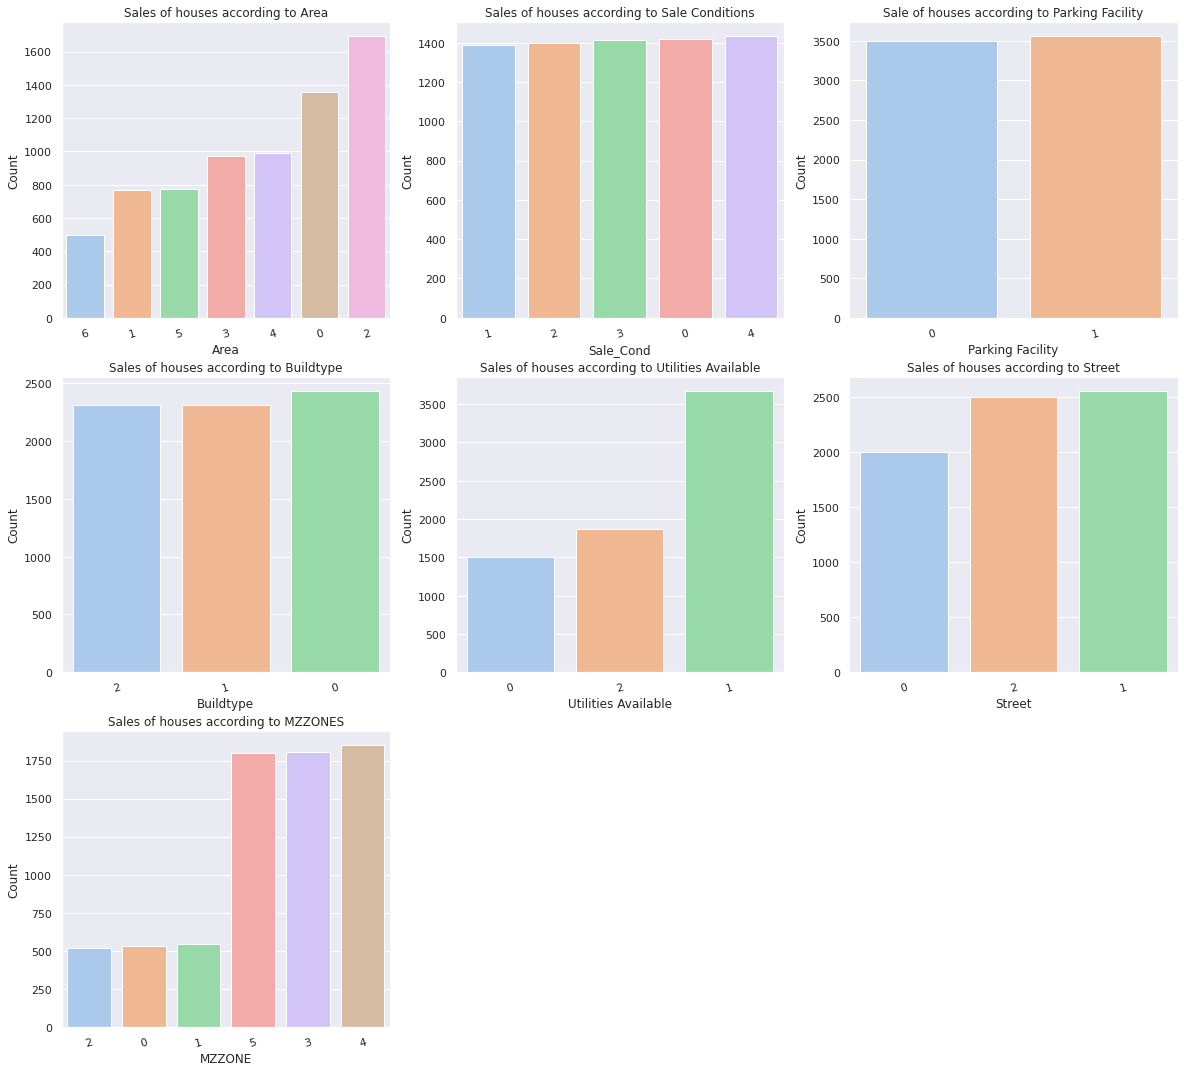

In [ ]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(data['AREA'],order=data['AREA'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Sales of houses according to Area')

plt.subplot(432)
sns.countplot(data['SALE_COND'],order=data['SALE_COND'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Sale_Cond')
plt.ylabel('Count')
plt.title('Sales of houses according to Sale Conditions')

plt.subplot(434)
sns.countplot(data['BUILDTYPE'],order=data['BUILDTYPE'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Buildtype')
plt.ylabel('Count')
plt.title('Sales of houses according to Buildtype')

plt.subplot(435)
sns.countplot(data['UTILITY_AVAIL'],order=data['UTILITY_AVAIL'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Count')
plt.title('Sales of houses according to Utilities Available')


plt.subplot(433)
sns.countplot(data['PARK_FACIL'],order=data['PARK_FACIL'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Count')
plt.title('Sale of houses according to Parking Facility')

plt.subplot(436)
sns.countplot(data['STREET'],order=data['STREET'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Count')
plt.title('Sales of houses according to Street')

plt.subplot(437)
sns.countplot(data['MZZONE'],order=data['MZZONE'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Count')
plt.title('Sales of houses according to MZZONES')

# **Splitting data**

In [ ]:
X=data[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'house_age']]
y=data['SALES_PRICE']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5644, 17) (1412, 17) (5644,) (1412,)


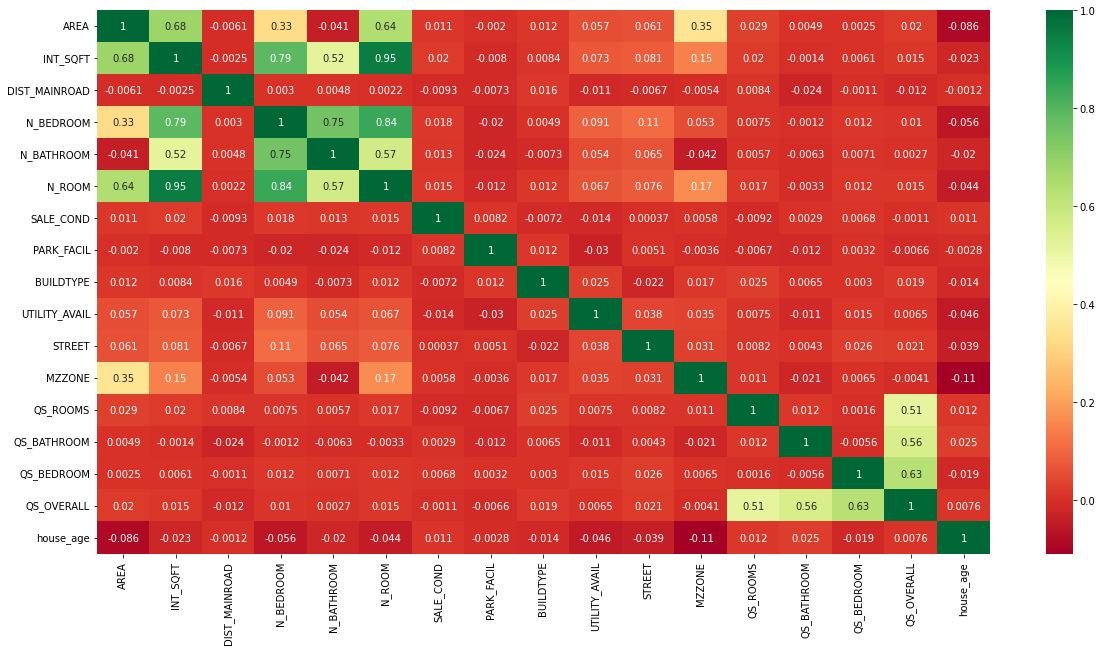

In [ ]:
# checking for correlations in the input data
plt.figure(figsize=(20,10))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

In [ ]:
# creating a function to detect the presence of features in our training set where the features are highly correlated
def correlation(dataset,threshold):
  correlated_features = set()
  cor_matrix = dataset.corr()
  for i in range(len(cor_matrix.columns)):
    for j in range(i):
      if abs(cor_matrix.iloc[i,j]) > threshold:
        col_name = cor_matrix.columns[i]
        correlated_features.add(col_name)
  return correlated_features

In [ ]:
corr_cols = correlation(X_train,0.8)
print(corr_cols)

{'N_ROOM'}


We see that number of rooms is highly correlated with area so it is good that we drop the column.

In [ ]:
data.drop(['N_ROOM'],axis=1,inplace=True)

In [ ]:
data.columns

In [ ]:
X=data[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
        'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'house_age']]
y=data['SALES_PRICE']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **MODEL 1 ----> LINEAR REGRESSION**

In [ ]:
linear_model=LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic 

LinearRegression()

In [ ]:
y_pred=linear_model.predict(X_test)

In [ ]:
from sklearn import metrics
a=metrics.r2_score(y_test,y_pred)
print(a)

0.8655573284457869


# **K Nearest neighbors**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsRegressor
for i in [1,2,3,4,5,6,7,8,9,10,11,20,50]:
  knn=KNeighborsRegressor(i)
  knn.fit(X_train_scaled,y_train)
  print("k value:",i,"train_score:",knn.score(X_train_scaled,y_train),"score:",np.mean(cross_val_score(knn,X_train,y_train,cv=10)))

k value: 1 train_score: 1.0 score: -0.06872721492810435
k value: 2 train_score: 0.9198612757338688 score: 0.1584764097699198
k value: 3 train_score: 0.8972401047346293 score: 0.26064579254726195
k value: 4 train_score: 0.886796377941868 score: 0.2942365720166821
k value: 5 train_score: 0.8803214074996787 score: 0.3227865529479863
k value: 6 train_score: 0.8749790796073348 score: 0.3379788552655177
k value: 7 train_score: 0.8728370578025211 score: 0.3491240958853843
k value: 8 train_score: 0.8697263148726166 score: 0.36016058901521963
k value: 9 train_score: 0.8678290912579092 score: 0.36594971202555593
k value: 10 train_score: 0.8649759505970914 score: 0.37008188261079916
k value: 11 train_score: 0.8631535554688656 score: 0.3730371119453574
k value: 20 train_score: 0.8431233978428416 score: 0.3917241814238589
k value: 50 train_score: 0.8096502343486198 score: 0.39962241760214295


In [ ]:
knn=KNeighborsRegressor(50)
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=50)

In [ ]:
y_pred=knn.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [ ]:
cross_val_knn_regressor=cross_val_score(knn,X_train,y_train,cv=15).mean()
cross_val_knn_regressor

0.40057859246933025

# **MODEL 3 ----> DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,15)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 15).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 15).mean())


Depth :  1  train Score  :  0.3552271844151964 cross_val_score :  0.35061038146235507
Depth :  2  train Score  :  0.6821906490049733 cross_val_score :  0.6790472094327602
Depth :  3  train Score  :  0.8014114840676423 cross_val_score :  0.7985049974140974
Depth :  4  train Score  :  0.886060749135797 cross_val_score :  0.8797406352684224
Depth :  5  train Score  :  0.9215681077313684 cross_val_score :  0.9128332940681818
Depth :  6  train Score  :  0.9441026707947291 cross_val_score :  0.935227274695496
Depth :  7  train Score  :  0.9595670515028532 cross_val_score :  0.9490238243331287
Depth :  8  train Score  :  0.9725568302909027 cross_val_score :  0.9575938630686868
Depth :  9  train Score  :  0.9823352866615807 cross_val_score :  0.9631319564214121
Depth :  10  train Score  :  0.9896738749295523 cross_val_score :  0.9654197918349309
Depth :  11  train Score  :  0.9944279871574194 cross_val_score :  0.9655284517565135
Depth :  12  train Score  :  0.9972340876178566 cross_val_score 

In [ ]:
dt_regressor=DecisionTreeRegressor(max_depth=11, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=11, random_state=0)

In [ ]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=15).mean()
cross_val_dt_regressor

0.9655284517565135

In [ ]:
ftImp = list(zip(dt_regressor.feature_importances_, data.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
0,0.477275,AREA
7,0.334020,PARK_FACIL
1,0.102495,INT_SQFT
10,0.039375,UTILITY_AVAIL
6,0.015891,SALE_COND
3,0.011436,DIST_MAINROAD
9,0.010667,BUILDTYPE
15,0.002507,QS_BEDROOM
14,0.001122,QS_BATHROOM
5,0.001119,N_BATHROOM


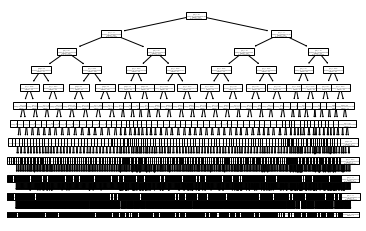

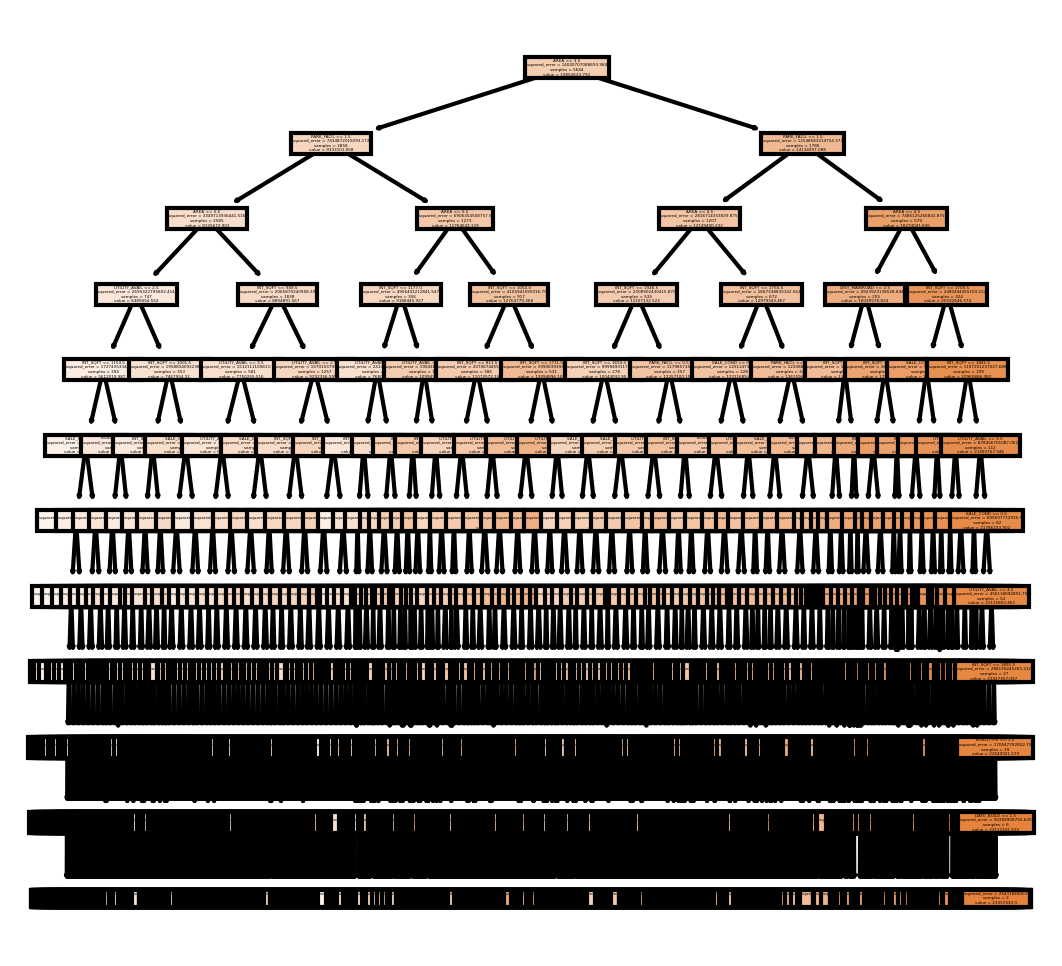

In [ ]:
from sklearn import tree
tree.plot_tree(dt_regressor) 

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_regressor,
               feature_names = data.columns[:-1],
               filled = True);
fig.savefig('imagename.png')

# **MODEL 4 ----> Random Forest Regression**

In [ ]:
max_depth=np.arange(1,20)
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  1 cross_val_score :  0.350718985585496
Depth :  2 cross_val_score :  0.6791353963269804
Depth :  3 cross_val_score :  0.8088975588774645
Depth :  4 cross_val_score :  0.8912012660355387
Depth :  5 cross_val_score :  0.9271534868730709
Depth :  6 cross_val_score :  0.9498512713311728
Depth :  7 cross_val_score :  0.9649903405396378
Depth :  8 cross_val_score :  0.9744420514409099
Depth :  9 cross_val_score :  0.9797832250363019
Depth :  10 cross_val_score :  0.9824781811621273
Depth :  11 cross_val_score :  0.9838740110219014
Depth :  12 cross_val_score :  0.9843873609525743
Depth :  13 cross_val_score :  0.9845715496289283
Depth :  14 cross_val_score :  0.9847358946111147
Depth :  15 cross_val_score :  0.9847680214871641
Depth :  16 cross_val_score :  0.9847759609938113
Depth :  17 cross_val_score :  0.9847445593037801
Depth :  18 cross_val_score :  0.9847480269451104
Depth :  19 cross_val_score :  0.9847455404585486


In [ ]:
cross_val_rf_regressor=max(cross_val_rf)
print(cross_val_rf_regressor)

0.9847759609938113


In [ ]:
print("The best depth is 17 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 17 and Cross_val_score is: 0.9847759609938113


In [ ]:
rf_regressor=RandomForestRegressor(max_depth=18, random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=18, random_state=0)

In [ ]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.9847480269451104

# **MODEL - 5 -----> Gradient Boosting Regression**

In [ ]:
cross_val_gb=[]
for lr in [0.01,0.05,0.1,0.2,0.3,0.35,0.4,0.5,0.8,1]:
  gb_regressor= GradientBoostingRegressor(learning_rate=lr)
  gb_regressor.fit(X_train, y_train)
  print("Learning rate : ", lr, "cross_val_score : ", cross_val_score(gb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_gb.append(cross_val_score(gb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score :  0.7358101026207329
Learning rate :  0.05 cross_val_score :  0.9716937533505984
Learning rate :  0.1 cross_val_score :  0.9901174767437325
Learning rate :  0.2 cross_val_score :  0.9952987937934824
Learning rate :  0.3 cross_val_score :  0.9952167695752814
Learning rate :  0.35 cross_val_score :  0.995613516100928
Learning rate :  0.4 cross_val_score :  0.9953058950478255
Learning rate :  0.5 cross_val_score :  0.9959610798252659
Learning rate :  0.8 cross_val_score :  0.9956835442440657
Learning rate :  1 cross_val_score :  0.9947276557748723


In [ ]:
cross_val_gb_regressor=max(cross_val_gb)

In [ ]:
print("The best Learning rate is 0.3 and Cross_val_score is:",cross_val_gb_regressor)

The best Learning rate is 0.3 and Cross_val_score is: 0.9959605287195894


In [ ]:
gb_regressor= GradientBoostingRegressor(learning_rate=0.35)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.35)

In [ ]:
cross_val_gb_regressor=cross_val_score(gb_regressor,X_train,y_train,cv=15).mean()
cross_val_gb_regressor

0.9956106209029902

# **MODEL - 6 -----> Extreme Gradient Boosting Regression**

In [ ]:
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.09,0.1,0.11,0.12,0.13,0.15,0.18,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate = lr,n_estimators=1000) 
  xgb_regressor.fit(X_train,y_train) 
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

[09:44:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:44:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:44:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:44:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:44:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [ ]:
print("The best Learning rate is 0.09 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.09 and Cross_val_score is: 0.9987919864890527


In [ ]:
  xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate =0.12,n_estimators=1000) # initialise the model
  xgb_regressor.fit(X_train,y_train) #train the model

[09:59:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, learning_rate=0.12, n_estimators=1000)

In [ ]:
#print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Gradient Boosting Regression Model: ",cross_val_gb_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for K-Nearest Neighbors Regression Model: 0.40057859246933025
Cross Validation Score for Decision Tree Regression Model:  0.9655284517565135
Cross Validation Score for Random Forest Regression Model:  0.9847480269451104
Cross Validation Score for Gradient Boosting Regression Model:  0.9956106209029902
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.9987919864890527


COMPARING R2 SCORE

In [ ]:
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_gb=gb_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [ ]:
R2_score_lr=metrics.r2_score(y_test,y_pred_lr)
R2_score_knn=metrics.r2_score(y_test,y_pred_knn)
R2_score_dt=metrics.r2_score(y_test,y_pred_dt)
R2_score_rf=metrics.r2_score(y_test,y_pred_rf)
R2_score_gb=metrics.r2_score(y_test,y_pred_gb)
R2_score_xgb=metrics.r2_score(y_test,y_pred_xgb)

In [ ]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Gradient Boosting Regression Model: ",R2_score_gb)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.8655573284457869
R2 Score for K-Nearest Neighbors Regression Model: -0.8397128285848756
R2 Score for Decision Tree Regression Model:  0.9673776824077556
R2 Score for Random Forest Regression Model:  0.9853044122156207
R2 Score for Gradient Boosting Regression Model:  0.9963623850633634
R2 Score for Extreme-Gradient Boosting Regression Model:  0.9987991540866724


# **INFERENCE**

In [ ]:
rf_regressor.feature_importances_

array([0.4748021 , 0.11029155, 0.00180008, 0.00346752, 0.0019758 ,
       0.00191382, 0.01436325, 0.33166499, 0.00070652, 0.01003146,
       0.03832028, 0.00162069, 0.00164032, 0.0016807 , 0.00181528,
       0.00390564])

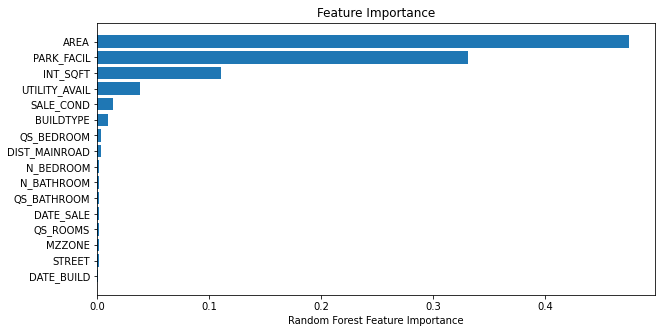

In [ ]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
xgb_regressor.feature_importances_

array([2.90090561e-01, 6.01969957e-02, 1.04970655e-04, 7.37153515e-02,
       2.71678437e-02, 6.38014544e-03, 6.31881654e-02, 3.20583165e-01,
       4.04510461e-03, 2.41784696e-02, 1.22893430e-01, 5.28239470e-04,
       3.90566565e-04, 7.98109861e-04, 4.08562424e-04, 5.33023197e-03],
      dtype=float32)

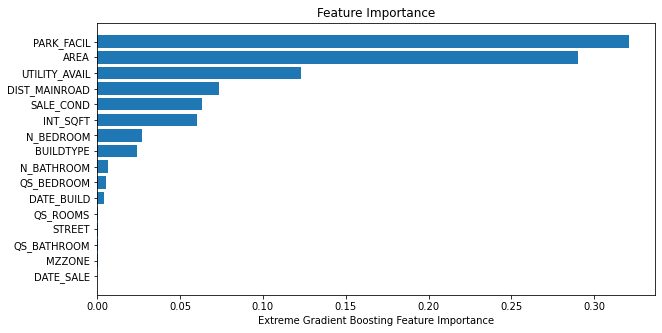

In [ ]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()